## **Load the Preprocessed Data**

First, you need to import the required libraries and load the `preprocessed_data.csv` file that you saved earlier.

In [1]:
import pandas as pd
import numpy as np

# Load the preprocessed data
new_data = pd.read_csv(r"E:/Random Python Scripts/CICIDS/CICIDS2017/preprocessed_data.csv")

## **Prepare the Dataset for Binary Classification**

Next, create a balanced dataset for binary classification by separating normal traffic from intrusions, sampling them appropriately, and encoding the attack types.

In [2]:
# Creating a balanced dataset for Binary Classification
normal_traffic = new_data.loc[new_data['Attack Type'] == 'BENIGN']
intrusions = new_data.loc[new_data['Attack Type'] != 'BENIGN']

# Sample normal traffic to match the number of intrusions
normal_traffic = normal_traffic.sample(n=len(intrusions), replace=False)

# Concatenate intrusions and sampled normal traffic
ids_data = pd.concat([intrusions, normal_traffic])
ids_data['Attack Type'] = np.where((ids_data['Attack Type'] == 'BENIGN'), 0, 1)

# Sample a subset of the data for training/testing
bc_data = ids_data.sample(n=15000)

print(bc_data['Attack Type'].value_counts())

Attack Type
1    7571
0    7429
Name: count, dtype: int64


## **Split the Data into Features and Target**

Now, split your data into features (X) and target (y) for model training.


In [3]:
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and target (y)
X_bc = bc_data.drop('Attack Type', axis=1)
y_bc = bc_data['Attack Type']

# Train-test split
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.25, random_state=0)

# **Dense Neural Network (DNN)**

## **Binary Classification**

In [16]:
#Deep Nueral Network with Keras
import tensorflow as tf
from numpy import loadtxt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, roc_auc_score, roc_curve, auc, precision_recall_curve

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD

from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import os
import logging

'''
# Log setting
logging.basicConfig(format="%(asctime)s %(levelname)s %(message)s", datefmt="%H:%M:%S", level=logging.INFO)

# Change display.max_rows to show all features.
pd.set_option("display.max_rows", 85)
'''

In [6]:
# load the dataset
# Binary Classification (X_train_bc, X_test_bc, y_train_bc, y_test_bc)
# Multi-Class Classification (X_train, X_test, y_train, y_test)

In [17]:
# Define the Keras Model
model = Sequential()
model.add(Dense(120, activation='relu', input_dim=X_train_bc.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(80, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(70, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Use 'sigmoid' for binary classification

C:\Users\Siddharth\anaconda3\envs\cicids\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# Compile the Keras model for binary classification
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

C:\Users\Siddharth\anaconda3\envs\cicids\lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [9]:
#logging.info(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 120)                 │           4,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 80)                  │           9,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 80)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 70)                  │           5,670 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 70)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              71 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,741 (77.11 KB)

 Trainable params: 19,741 (77.11 KB)

 Non-trainable params: 0 (0.00 B)

14:38:10 INFO None


In [25]:
# fit the keras model on the dataset
history = model.fit(X_train_bc, y_train_bc, epochs=200, batch_size=300,verbose=1, validation_split=0.1)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9674 - loss: 0.0784 - val_accuracy: 0.9707 - val_loss: 0.0705
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9689 - loss: 0.0780 - val_accuracy: 0.9689 - val_loss: 0.0720
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9687 - loss: 0.0796 - val_accuracy: 0.9671 - val_loss: 0.0717
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9700 - loss: 0.0779 - val_accuracy: 0.9707 - val_loss: 0.0717
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9697 - loss: 0.0729 - val_accuracy: 0.9689 - val_loss: 0.0730
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9706 - loss: 0.0747 - val_accuracy: 0.9742 - val_loss: 0.0696
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9664 - loss: 0.0825 - val_accuracy: 0.9742 - val_loss: 0.0713
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9708 - loss: 0.0746 - val_accuracy: 0.9671 - v

In [11]:
# Save the Keras model to an .h5 file
model.save('keras_model_bc.h5')
print('Model saved as keras_model_bc.h5')

14:39:14 WARNING You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


Model saved as keras_model_bc.h5


In [12]:
'''
from tensorflow.keras.models import load_model

# Load the model from the .h5 file
loaded_model = load_model('keras_model.h5')

# Example of making predictions using the loaded model
predictions = loaded_model.predict(X_test_bc)
print(predictions)
'''

"\nfrom tensorflow.keras.models import load_model\n\n# Load the model from the .h5 file\nloaded_model = load_model('keras_model.h5')\n\n# Example of making predictions using the loaded model\npredictions = loaded_model.predict(X_test_bc)\nprint(predictions)\n"

# **Performance Evaluation**

In [20]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test_bc, y_test_bc)
print('Accuracy: %.2f' % (accuracy*100))

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9713 - loss: 0.0767
Accuracy: 97.07


In [21]:
# Make predictions on the test set
y_pred = (model.predict(X_test_bc) > 0.5).astype("int32")  # Thresholding for binary classification

# Generate classification report
report = classification_report(y_test_bc, y_pred)
print(report)

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1843
           1       0.95      0.99      0.97      1907

    accuracy                           0.97      3750
   macro avg       0.97      0.97      0.97      3750
weighted avg       0.97      0.97      0.97      3750



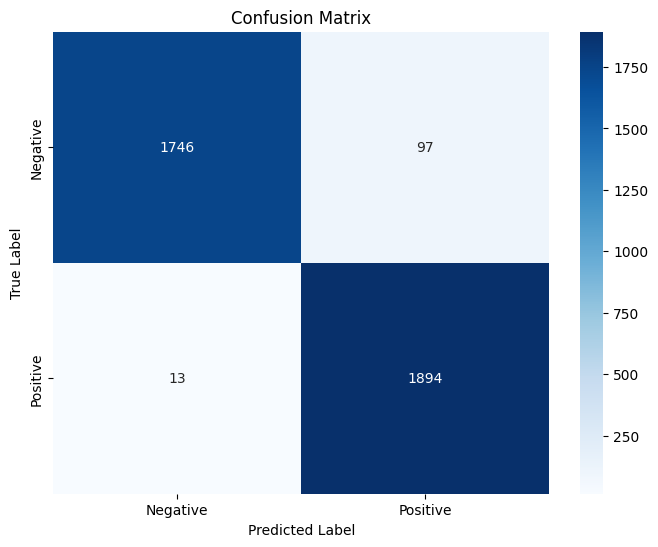

In [23]:
# Confusion Matrix and Heatmap
conf_matrix = confusion_matrix(y_test_bc, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

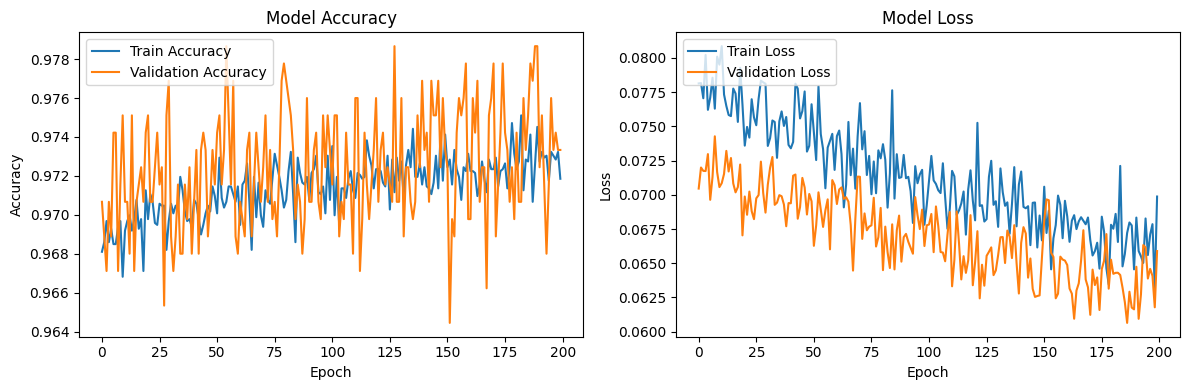

In [26]:
# Plotting accuracy and loss
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()